In [0]:
import pandas as pd
import numpy as np
import os, shutil
from keras import models, layers, optimizers
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import tensorflow.keras.metrics
from keras.models import load_model

In [2]:
df = pd.read_csv('/content/drive/My Drive/task5/plant-pathology-2020-fgvc7/train.csv')
df[['healthy', 'multiple_diseases', 'rust', 'scab']] = df[['healthy', 'multiple_diseases', 'rust', 'scab']].astype('float64')
print(df[:20])
df.info()

    image_id  healthy  multiple_diseases  rust  scab
0    Train_0      0.0                0.0   0.0   1.0
1    Train_1      0.0                1.0   0.0   0.0
2    Train_2      1.0                0.0   0.0   0.0
3    Train_3      0.0                0.0   1.0   0.0
4    Train_4      1.0                0.0   0.0   0.0
5    Train_5      1.0                0.0   0.0   0.0
6    Train_6      0.0                1.0   0.0   0.0
7    Train_7      0.0                0.0   0.0   1.0
8    Train_8      0.0                0.0   0.0   1.0
9    Train_9      1.0                0.0   0.0   0.0
10  Train_10      0.0                0.0   1.0   0.0
11  Train_11      0.0                0.0   0.0   1.0
12  Train_12      0.0                0.0   0.0   1.0
13  Train_13      1.0                0.0   0.0   0.0
14  Train_14      0.0                0.0   1.0   0.0
15  Train_15      0.0                0.0   1.0   0.0
16  Train_16      0.0                0.0   0.0   1.0
17  Train_17      0.0                0.0   0.0

In [3]:
healthy_df = df[df.healthy == 1.0]
print('healthy ', len(healthy_df))

multiple_diseases_df = df[df.multiple_diseases == 1.0]
print('multiple_diseases ', len(multiple_diseases_df))

rust_df = df[df.rust == 1.0]
print('rust ', len(rust_df))

scab_df = df[df.scab == 1.0]
print('scab ', len(scab_df))

healthy  516
multiple_diseases  91
rust  622
scab  592


Making folders for feature selection.

In [0]:
task5 = '/content/drive/My Drive'
original_dataset_dir = '/content/drive/My Drive/task5/plant-pathology-2020-fgvc7/images'

healthy = '/content/drive/My Drive/task5/healthy'
os.mkdir(healthy)

multiple_diseases = '/content/drive/My Drive/task5/multiple_diseases'
os.mkdir(multiple_diseases)

rust = '/content/drive/My Drive/task5/rust'
os.mkdir(rust)

scab = '/content/drive/My Drive/task5/scab'
os.mkdir(scab)


Feature selection.

In [0]:
# healthy
fnames = ['{}.jpg'.format(i) for i in healthy_df.image_id]
for fname in fnames:
  source = os.path.join(original_dataset_dir, fname)
  destination = os.path.join(healthy, fname)
  shutil.copyfile(source, destination)

# multiple_diseases
fnames = ['{}.jpg'.format(i) for i in multiple_diseases_df.image_id]
for fname in fnames:
  source = os.path.join(original_dataset_dir, fname)
  destination = os.path.join(multiple_diseases, fname)
  shutil.copyfile(source, destination)

# rust
fnames = ['{}.jpg'.format(i) for i in rust_df.image_id]
for fname in fnames:
  source = os.path.join(original_dataset_dir, fname)
  destination = os.path.join(rust, fname)
  shutil.copyfile(source, destination)

# scab
fnames = ['{}.jpg'.format(i) for i in scab_df.image_id]
for fname in fnames:
  source = os.path.join(original_dataset_dir, fname)
  destination = os.path.join(scab, fname)
  shutil.copyfile(source, destination)


In [0]:
files_1 = os.listdir(path='/content/drive/My Drive/task5/healthy')
files_2 = os.listdir(path='/content/drive/My Drive/task5/multiple_diseases')
files_3 = os.listdir(path='/content/drive/My Drive/task5/rust')
files_4 = os.listdir(path='/content/drive/My Drive/task5/scab')
print(len(files_1) + len(files_2) + len(files_3) + len(files_4))

1821


Making folders for train, validation and test datasets and filling it by images.

In [0]:
#folders

#train

train = '/content/drive/My Drive/task5/train'
os.mkdir(train)
train_healthy = '/content/drive/My Drive/task5/train/train_healthy'
os.mkdir(train_healthy)
train_multiple_diseases = '/content/drive/My Drive/task5/train/train_multiple_diseases'
os.mkdir(train_multiple_diseases)
train_rust = '/content/drive/My Drive/task5/train/train_rust'
os.mkdir(train_rust)
train_scab = '/content/drive/My Drive/task5/train/train_scab'
os.mkdir(train_scab)

In [0]:
#validation

validation = '/content/drive/My Drive/task5/validation'
os.mkdir(validation)
validation_healthy = '/content/drive/My Drive/task5/validation/validation_healthy'
os.mkdir(validation_healthy)
validation_multiple_diseases = '/content/drive/My Drive/task5/validation/validation_multiple_diseases'
os.mkdir(validation_multiple_diseases)
validation_rust = '/content/drive/My Drive/task5/validation/validation_rust'
os.mkdir(validation_rust)
validation_scab = '/content/drive/My Drive/task5/validation/validation_scab'
os.mkdir(validation_scab)

In [0]:
#test

test = '/content/drive/My Drive/task5/test'
os.mkdir(test)
test_healthy = '/content/drive/My Drive/task5/test/test_healthy'
os.mkdir(test_healthy)
test_multiple_diseases = '/content/drive/My Drive/task5/test/test_multiple_diseases'
os.mkdir(test_multiple_diseases)
test_rust = '/content/drive/My Drive/task5/test/test_rust'
os.mkdir(test_rust)
test_scab = '/content/drive/My Drive/task5/test/test_scab'
os.mkdir(test_scab)

In [0]:
#filling train_healthy, validation_healthy and test_healthy

fnames = ['{}.jpg'.format(i) for i in healthy_df.image_id]
i = 0
for fname in fnames:
  source = os.path.join(healthy, fname)
  if i < 361:
    destination = os.path.join(train_healthy, fname)
  elif i < 436:
    destination = os.path.join(validation_healthy, fname)
  else:
    destination = os.path.join(test_healthy, fname)
  shutil.move(source, destination)
  i += 1

print('i= ', i)

516
i=  516


In [0]:
# filling train_multiple_diseases, validation_multiple_diseases and test_multiple_diseases

fnames = ['{}.jpg'.format(i) for i in multiple_diseases_df.image_id]
i = 0
for fname in fnames:
  source = os.path.join(multiple_diseases, fname)
  if i < 64:
    destination = os.path.join(train_multiple_diseases, fname)
  elif i < 78:
    destination = os.path.join(validation_multiple_diseases, fname)
  else:
    destination = os.path.join(test_multiple_diseases, fname)
  shutil.move(source, destination)
  i += 1

print('i= ', i)

i=  91


In [0]:
# filling train_rust, validation_rust and test_rust

fnames = ['{}.jpg'.format(i) for i in rust_df.image_id]
i = 0
for fname in fnames:
  source = os.path.join(rust, fname)
  if i < 435:
    destination = os.path.join(train_rust, fname)
  elif i < 529:
    destination = os.path.join(validation_rust, fname)
  else:
    destination = os.path.join(test_rust, fname)
  shutil.move(source, destination)
  i += 1

print('i= ', i)

i=  622


In [0]:
# filling train_scab, validation_scab and test_scab

fnames = ['{}.jpg'.format(i) for i in scab_df.image_id]
i = 0
for fname in fnames:
  source = os.path.join(scab, fname)
  if i < 414:
    destination = os.path.join(train_scab, fname)
  elif i < 503:
    destination = os.path.join(validation_scab, fname)
  else:
    destination = os.path.join(test_scab, fname)
  shutil.move(source, destination)
  i += 1

print('i= ', i)

i=  592


**Construction of model without dropout.**

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train,
    target_size=(150, 150),
    batch_size=10,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation,
    target_size=(150, 150),
    batch_size=10,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test,
    target_size=(150, 150),
    batch_size=1,
    class_mode='categorical')

Found 1274 images belonging to 4 classes.
Found 272 images belonging to 4 classes.
Found 275 images belonging to 4 classes.


In [10]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)


Epoch 1/30
  5/100 [>.............................] - ETA: 19:38 - loss: 1.3102 - accuracy: 0.3182

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 27 could not be retrieved. It could be because a worker has died.
  UserWarning)


  8/100 [=>............................] - ETA: 22:08 - loss: 1.3030 - accuracy: 0.3514

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 19 could not be retrieved. It could be because a worker has died.
  UserWarning)


 17/100 [====>.........................] - ETA: 19:03 - loss: 1.2908 - accuracy: 0.3232

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 41 could not be retrieved. It could be because a worker has died.
  UserWarning)


 33/100 [========>.....................] - ETA: 15:20 - loss: 1.2474 - accuracy: 0.3673

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 117 could not be retrieved. It could be because a worker has died.
  UserWarning)


 50/100 [==============>...............] - ETA: 11:07 - loss: 1.2550 - accuracy: 0.3603

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 21 could not be retrieved. It could be because a worker has died.
  UserWarning)


 51/100 [==============>...............] - ETA: 11:13 - loss: 1.2561 - accuracy: 0.3631

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 118 could not be retrieved. It could be because a worker has died.
  UserWarning)


 56/100 [===============>..............] - ETA: 10:18 - loss: 1.2538 - accuracy: 0.3610

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 104 could not be retrieved. It could be because a worker has died.
  UserWarning)


 57/100 [================>.............] - ETA: 10:17 - loss: 1.2549 - accuracy: 0.3564

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 0 could not be retrieved. It could be because a worker has died.
  UserWarning)


100/100 [==============================] - 1504s 15s/step - loss: 1.2487 - accuracy: 0.3531 - val_loss: 1.1208 - val_accuracy: 0.2785
Epoch 2/30
 22/100 [=====>........................] - ETA: 6:23 - loss: 1.2540 - accuracy: 0.3591

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 114 could not be retrieved. It could be because a worker has died.
  UserWarning)


100/100 [==============================] - 318s 3s/step - loss: 1.2439 - accuracy: 0.3710 - val_loss: 1.0634 - val_accuracy: 0.4545
Epoch 3/30
100/100 [==============================] - 102s 1s/step - loss: 1.1974 - accuracy: 0.4095 - val_loss: 1.2226 - val_accuracy: 0.3740
Epoch 4/30
100/100 [==============================] - 102s 1s/step - loss: 1.1943 - accuracy: 0.4235 - val_loss: 1.3502 - val_accuracy: 0.4607
Epoch 5/30
100/100 [==============================] - 102s 1s/step - loss: 1.1886 - accuracy: 0.4386 - val_loss: 1.2566 - val_accuracy: 0.5041
Epoch 6/30
100/100 [==============================] - 102s 1s/step - loss: 1.1869 - accuracy: 0.4256 - val_loss: 1.1284 - val_accuracy: 0.4711
Epoch 7/30
100/100 [==============================] - 105s 1s/step - loss: 1.1680 - accuracy: 0.4420 - val_loss: 1.3240 - val_accuracy: 0.4917
Epoch 8/30
100/100 [==============================] - 101s 1s/step - loss: 1.1683 - accuracy: 0.4443 - val_loss: 0.9978 - val_accuracy: 0.5393
Epoch 9/30

In [0]:
model.save('leaves_without_dropout.h5')

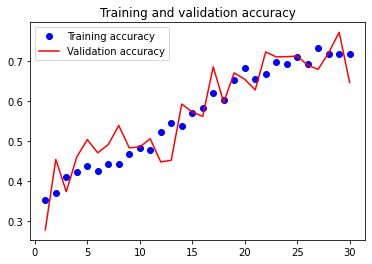

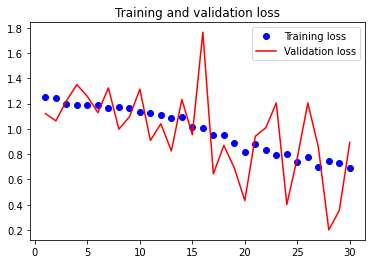

In [12]:
# graphics

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [13]:
scores = model.evaluate_generator(test_generator, verbose=1)
print(model.metrics_names)
scores

275/275 [==============================] - 330s 1s/step
['loss', 'accuracy']


[2.1898117065429688, 0.6545454263687134]

**Construction of model with dropout.**

In [0]:
model_dr = models.Sequential()
model_dr.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model_dr.add(layers.MaxPooling2D((2, 2)))
model_dr.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_dr.add(layers.MaxPooling2D((2, 2)))
model_dr.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_dr.add(layers.Dropout(0.4))
model_dr.add(layers.MaxPooling2D((2, 2)))
model_dr.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_dr.add(layers.Dropout(0.4)) 
model_dr.add(layers.MaxPooling2D((2, 2)))
model_dr.add(layers.Flatten())
model_dr.add(layers.Dense(256, activation='relu'))
model_dr.add(layers.Dense(4, activation='softmax'))

model_dr.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy',
                       tensorflow.keras.metrics.Precision(),
                       tensorflow.keras.metrics.Recall()])

In [21]:
history_dr = model_dr.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 107s 1s/step - loss: 1.2552 - accuracy: 0.3520 - precision: 0.3923 - recall: 0.0341 - val_loss: 1.3183 - val_accuracy: 0.3455 - val_precision: 0.4146 - val_recall: 0.0138
Epoch 2/30
100/100 [==============================] - 102s 1s/step - loss: 1.2591 - accuracy: 0.3401 - precision: 0.4139 - recall: 0.0109 - val_loss: 1.2878 - val_accuracy: 0.4194 - val_precision: 0.3968 - val_recall: 0.0092
Epoch 3/30
100/100 [==============================] - 102s 1s/step - loss: 1.2126 - accuracy: 0.3730 - precision: 0.4359 - recall: 0.0107 - val_loss: 1.2427 - val_accuracy: 0.4236 - val_precision: 0.4663 - val_recall: 0.0125
Epoch 4/30
100/100 [==============================] - 102s 1s/step - loss: 1.1995 - accuracy: 0.4115 - precision: 0.4824 - recall: 0.0169 - val_loss: 1.2227 - val_accuracy: 0.4628 - val_precision: 0.4921 - val_recall: 0.0225
Epoch 5/30
100/100 [==============================] - 105s 1s/step - loss: 1.1884 - accuracy: 0.4296

In [0]:
model_dr.save('leaves_dropout.h5')

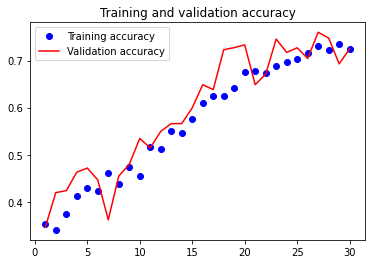

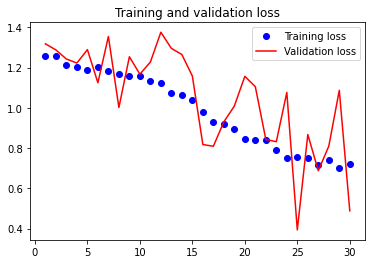

In [23]:
# graphics

acc = history_dr.history['accuracy']
val_acc = history_dr.history['val_accuracy']
loss = history_dr.history['loss']
val_loss = history_dr.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [24]:
scores = model_dr.evaluate_generator(test_generator, verbose=1)
print(model_dr.metrics_names)
scores

275/275 [==============================] - 14s 49ms/step
['loss', 'accuracy', 'precision', 'recall']


[1.496936559677124,
 0.7163636088371277,
 0.7423866391181946,
 0.31850647926330566]

**Feature maps.**

(1, 150, 150, 3)


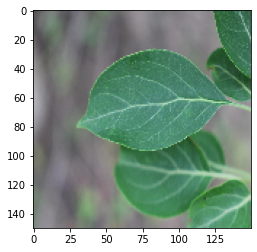

In [25]:
# preparing of image

img_path = '/content/drive/My Drive/task5/test/test_healthy/Train_1564.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)

plt.imshow(img_tensor[0])
plt.show()


In [26]:
model_dr.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
dropout_1 (Dropout)          (None, 34, 34, 128)       0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)      

In [27]:
layer_outputs = [layer.output for layer in model_dr.layers[:8]]
activation_model_dr = models.Model(inputs=model_dr.input, outputs=layer_outputs)

activations = activation_model_dr.predict(img_tensor)
for i in activations:
  print(i.shape)

(1, 148, 148, 32)
(1, 74, 74, 32)
(1, 72, 72, 64)
(1, 36, 36, 64)
(1, 34, 34, 128)
(1, 34, 34, 128)
(1, 17, 17, 128)
(1, 15, 15, 128)


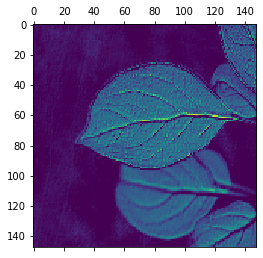

In [28]:
# layer 0
activations_0 = activations[0]
plt.matshow(activations_0[0, : , :, 30], cmap='viridis')

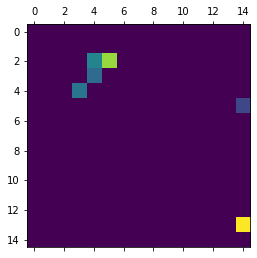

In [32]:
# layer 2
activations_2 = activations[7]
plt.matshow(activations_2[0, : , :, 15], cmap='viridis')


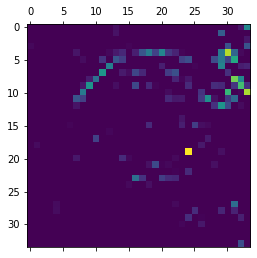

In [30]:
# layer 4
activations_4 = activations[4]
plt.matshow(activations_4[0, : , :, 50], cmap='viridis')


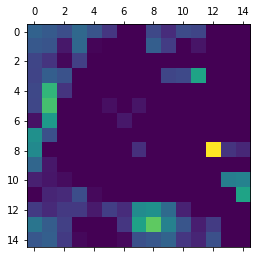

In [33]:
# layer 7
activations_7 = activations[7]
plt.matshow(activations_7[0, : , :, 56], cmap='viridis')


**Conclusion.**


The dropout layers allowed to increase the accuracy from 65 to 71 percent.